# Jahreswerte des Handelsvolumens nach Handelspartner: Export, Import und Gesamtvolumen

## USA und Canada vs USA und Mexico

### 2013 - 2018

// Henriette Sand, 564285

// Tobias Kolb, 549272

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_ca = pd.read_csv('dot2_ytd_2013-2018_usa-ca.csv', low_memory=False)
df_mx = pd.read_csv('dot2_ytd_2013-2018_usa-mx.csv', low_memory=False)

In [2]:
years = [2013, 2014, 2015, 2016, 2017, 2018]

In [3]:
def annual_values(df_country, result):
    i = 0

    while i<len(years):
        summe = 0
    
        for index, row in df_country.iterrows():  
                if row["YEAR"] == years[i]:
                    summe += row["VALUE"]
            
        result.append(summe)
        i = i+1

In [4]:
def plot(result, trade):
    x_pos = np.arange(len(years))
    
    plt.bar(x_pos, result, align="center", alpha=0.8)
    plt.xticks(x_pos, years)
    plt.ylabel("Value")
    plt.title("US-" + trade + " 2013 - 2018")

    plt.show()

In [5]:
def sum_exp_imp(exp, imp):
    result = []
        
    for e,i in zip(exp,imp):
        result.append(e+i)
        
    return result

## Canada

#### Export

In [6]:
df_ca_ex = df_ca[df_ca["TRDTYPE"] == 1]
res_ca_ex = []

In [7]:
annual_values(df_ca_ex, res_ca_ex)

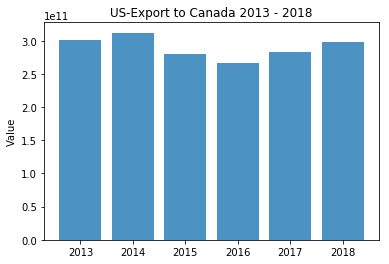

In [8]:
plot(res_ca_ex, "Export to Canada")

In [26]:
np.mean(res_ca_ex)

290150468077.3333

#### Import

In [10]:
df_ca_im = df_ca[df_ca["TRDTYPE"] == 2]
res_ca_im = []

In [11]:
annual_values(df_ca_im, res_ca_im)

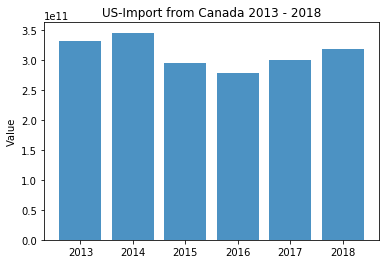

In [12]:
plot(res_ca_im, "Import from Canada")

In [27]:
np.mean(res_ca_im)

311721455630.6667

In [13]:
total_ca = sum_exp_imp(res_ca_ex, res_ca_im)

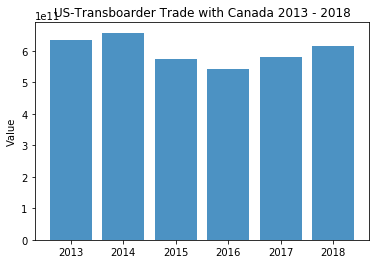

In [14]:
plot(total_ca, "Transboarder Trade with Canada")

In [28]:
np.mean(total_ca)

601871923708.0

## Mexico

#### Export

In [15]:
df_mx_ex = df_mx[df_mx["TRDTYPE"] == 1]
res_mx_ex = []

In [16]:
annual_values(df_mx_ex, res_mx_ex)

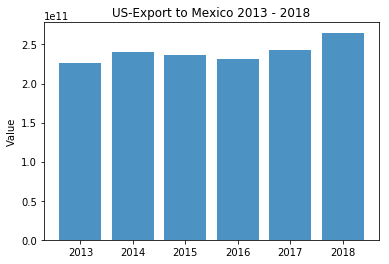

In [17]:
plot(res_mx_ex, "Export to Mexico")

In [29]:
np.mean(res_mx_ex)

240290123641.16666

#### Import

In [18]:
df_mx_im = df_mx[df_mx["TRDTYPE"] == 2]
res_mx_im = []

In [19]:
annual_values(df_mx_im, res_mx_im)

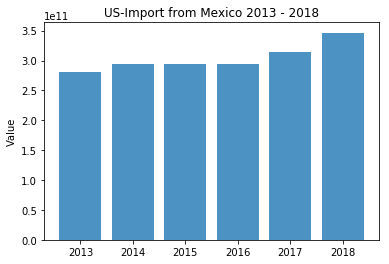

In [20]:
plot(res_mx_im, "Import from Mexico")

In [30]:
np.mean(res_mx_im)

304025226183.6667

In [21]:
total_mx = sum_exp_imp(res_mx_ex, res_mx_im)

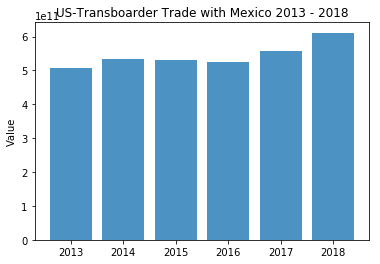

In [22]:
plot(total_mx, "Transboarder Trade with Mexico")

In [31]:
np.mean(total_mx)

544315349824.8333

In [23]:
file_ca = pd.DataFrame(data={"Year": years, "Export": res_ca_ex, "Import": res_ca_im, "Total": total_ca})
file_ca.to_csv("./total_trade_values_by_year_CA.csv", sep=',',index=False)

file_mx = pd.DataFrame(data={"Year": years, "Export": res_mx_ex, "Import": res_mx_im, "Total": total_mx})
file_mx.to_csv("./total_trade_values_by_year_MX.csv", sep=',',index=False)